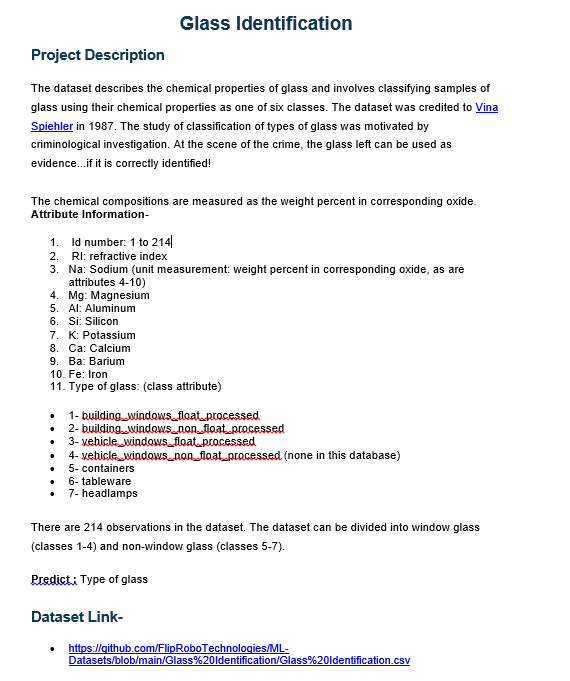

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from scipy import stats

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Define column headers
columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

In [139]:
df=pd.read_csv(r'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv',header=None,names=columns)
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [12]:
df.isnull().sum()

Id      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [13]:
df.isna().sum()

Id      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

<Axes: >

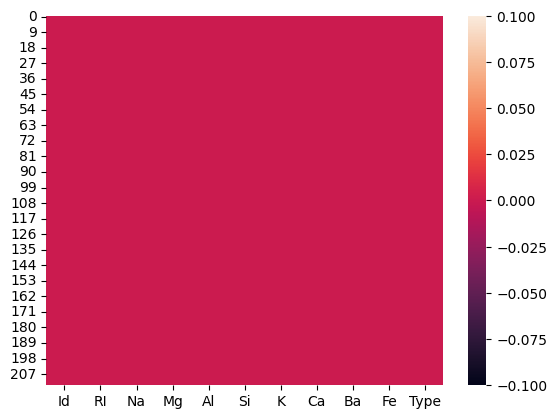

In [16]:
sns.heatmap(df.isnull())

In [14]:
df.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
# no null  value
# no na 
# all int or float not object value 


In [18]:
df['RI'].value_counts()

RI
1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: count, Length: 178, dtype: int64

In [21]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Id
1      1
135    1
137    1
138    1
139    1
      ..
75     1
76     1
77     1
78     1
214    1
Name: count, Length: 214, dtype: int64


RI
1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: count, Length: 178, dtype: int64


Na
13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: count, Length: 142, dtype: int64


Mg
0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: count, Length: 94, dtype: int64


Al
1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: count, Length: 118, dtype: int64


Si
72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: count, Length: 133, dtype: int64


K
0.00    30
0.57    1

In [22]:
df.dtypes.index

Index(['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [116]:
# checking for numerical columns

num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)

num_col

    

['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

In [117]:
# checking the unique value of each column 

df.nunique().to_frame('No of unique value')

,No of unique value
Id,214
RI,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32


In [27]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [ ]:
#Data visualization 


<Figure size 1200x600 with 0 Axes>

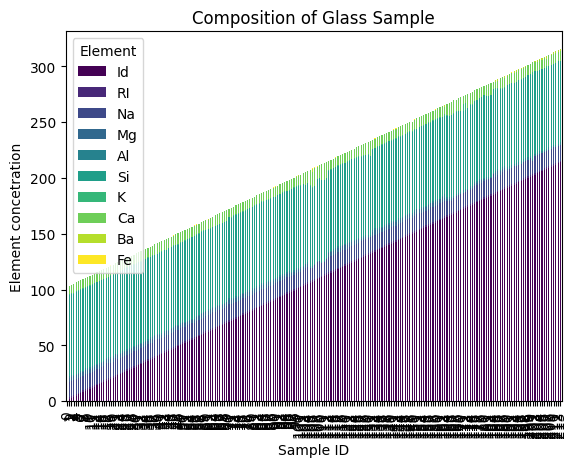

In [29]:
# ploting the bar chart
plt.figure(figsize=(12,6))
df.drop('Type',axis=1).plot(kind='bar',stacked=True,cmap='viridis')
plt.title('Composition of Glass Sample')
plt.xlabel('Sample ID')
plt.ylabel('Element concetration')
plt.legend(title='Element')
plt.show()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


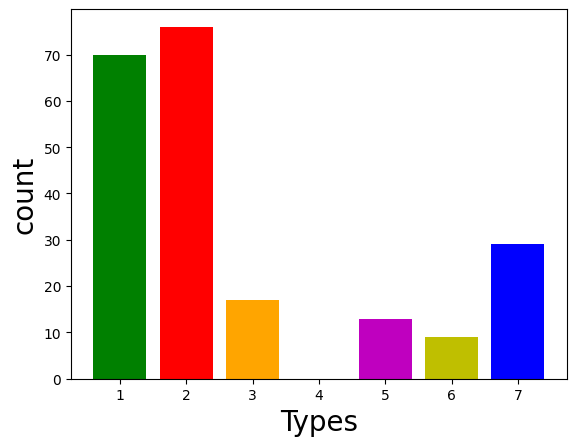

In [37]:
Types=df['Type'].value_counts()
print(Types)
plt.bar(Types.index,Types.values,color=['r','g','b','orange','m','y'])
plt.xlabel('Types',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.show()

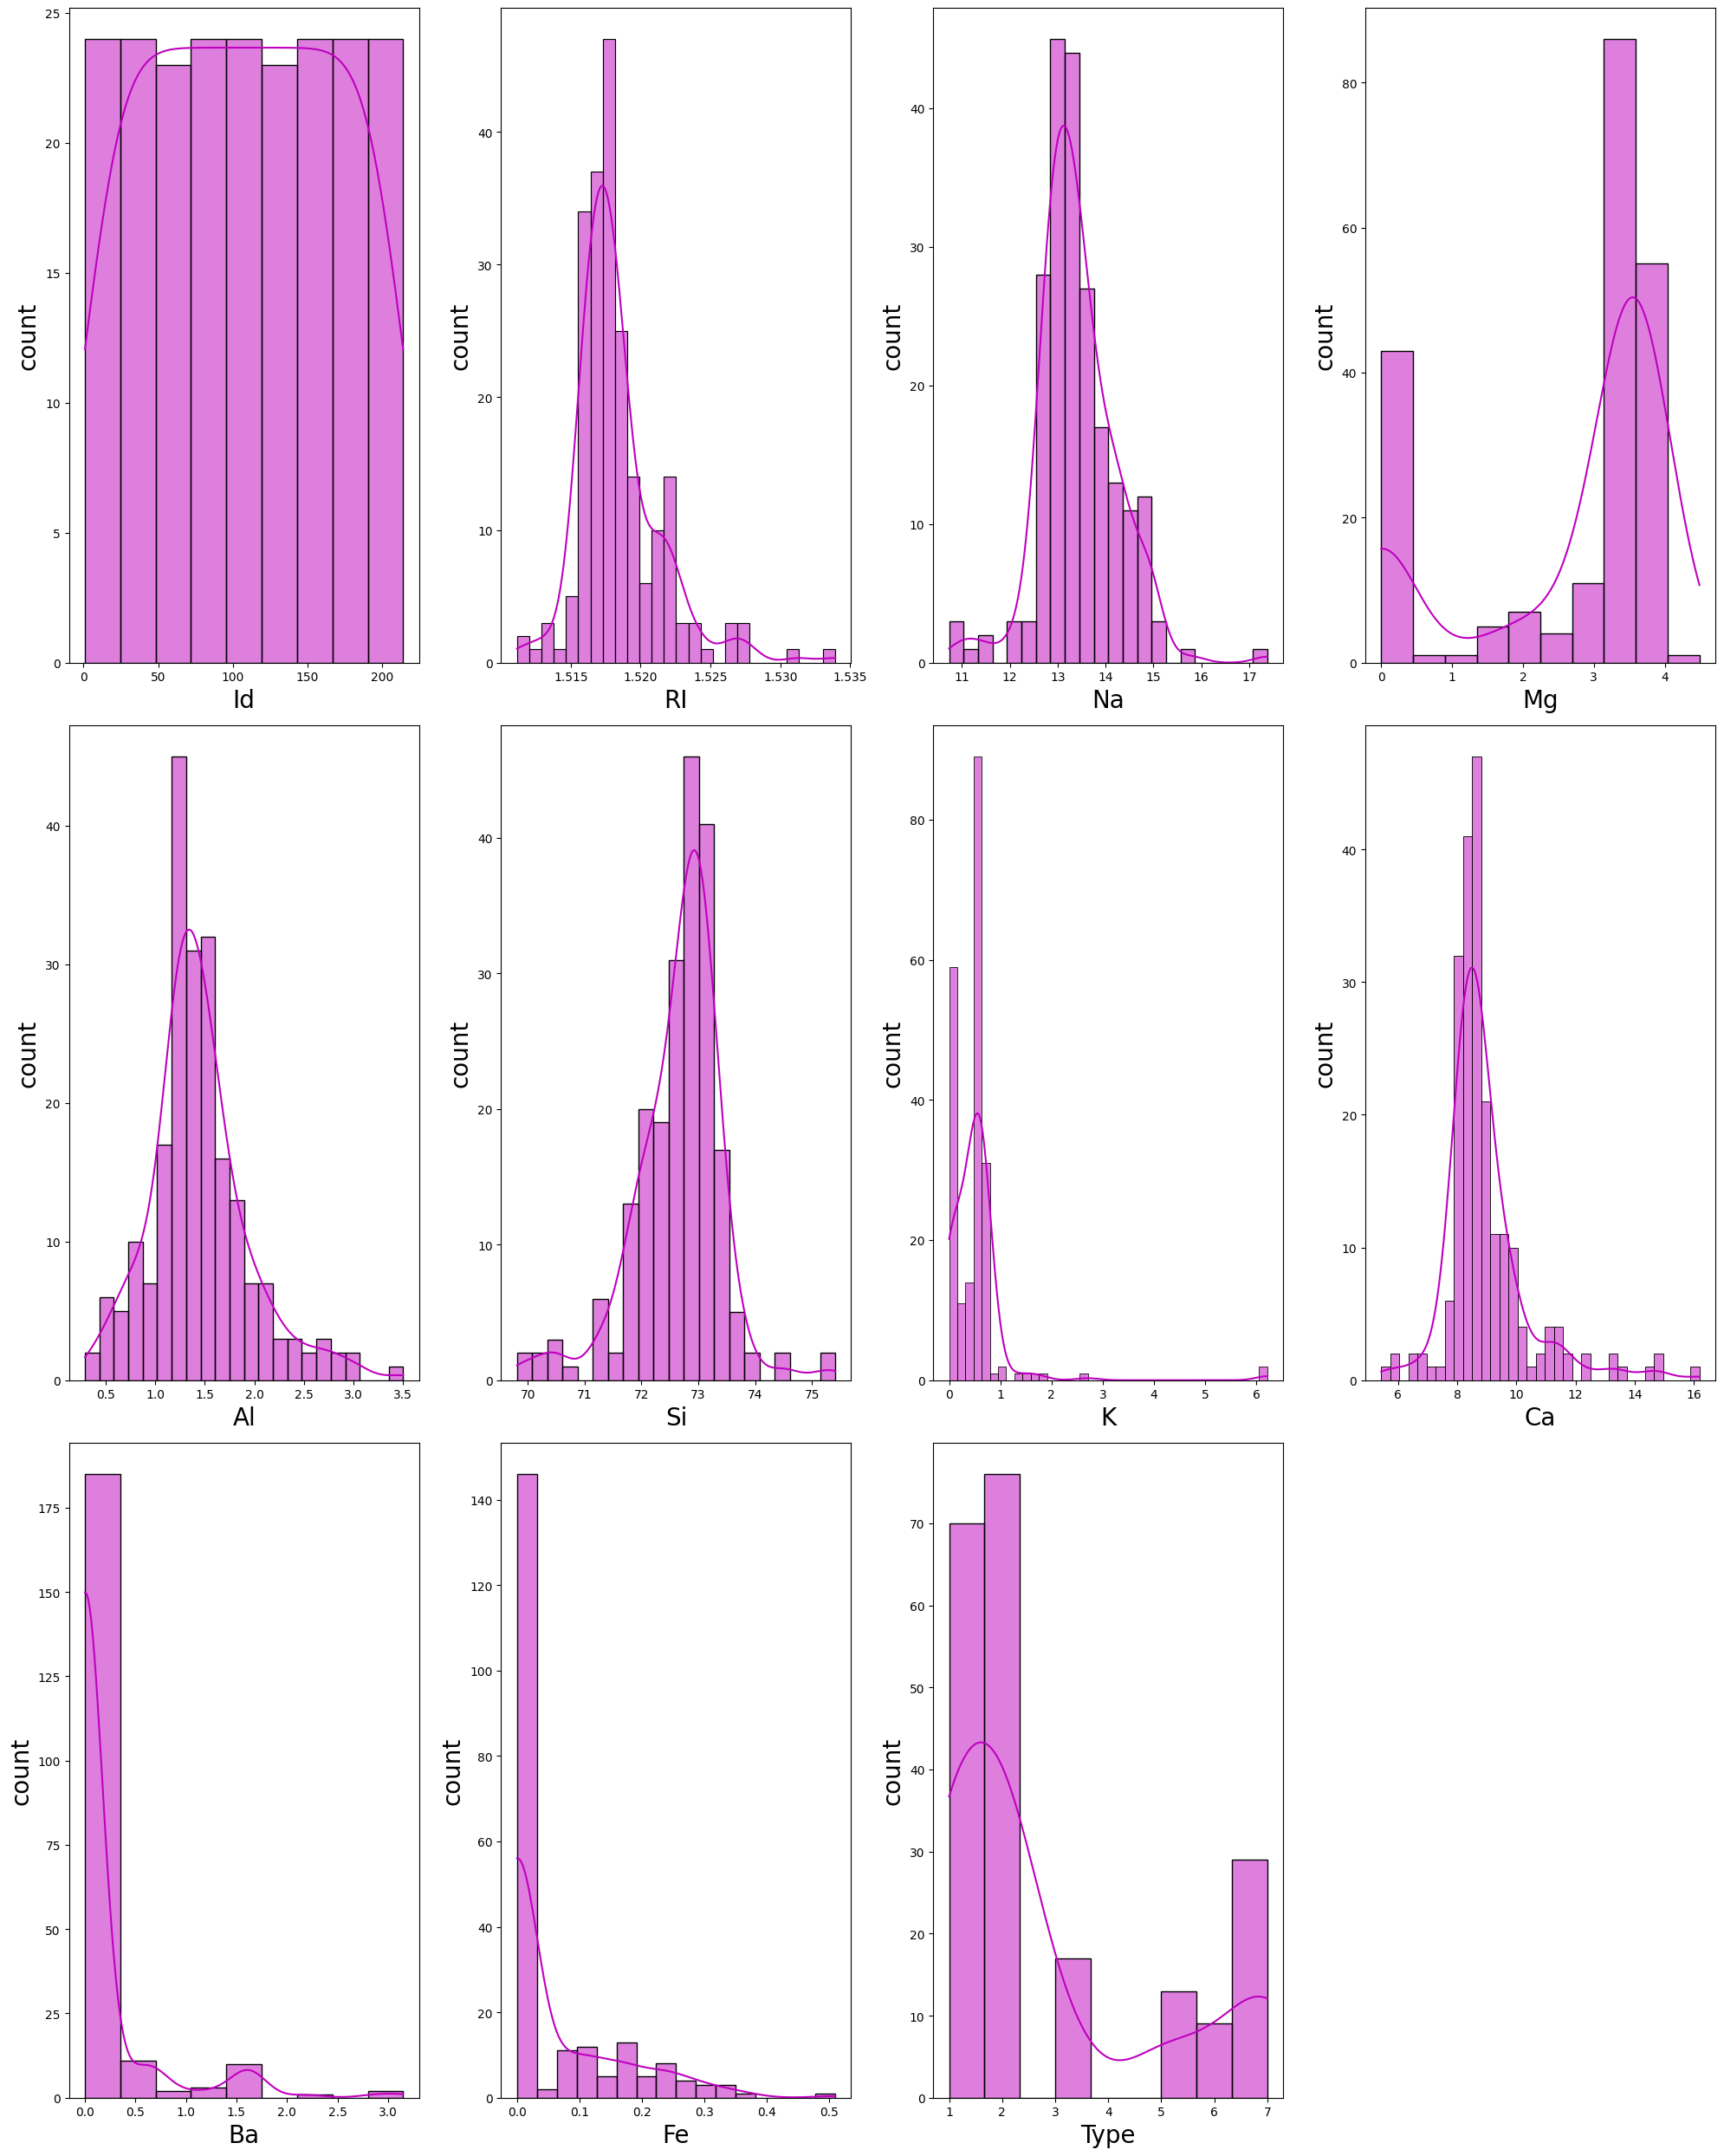

In [41]:
# histplot
plt.figure(figsize=(20,25),facecolor='white')

p=1

for col in num_col:
    if p<=11:
        axs=plt.subplot(3,4,p)
        sns.histplot(df[col],kde=True,color='m')
        plt.xlabel(col,fontsize=20)
        plt.ylabel('count',fontsize=20)
        
        p+=1
plt.tight_layout()
plt.show()

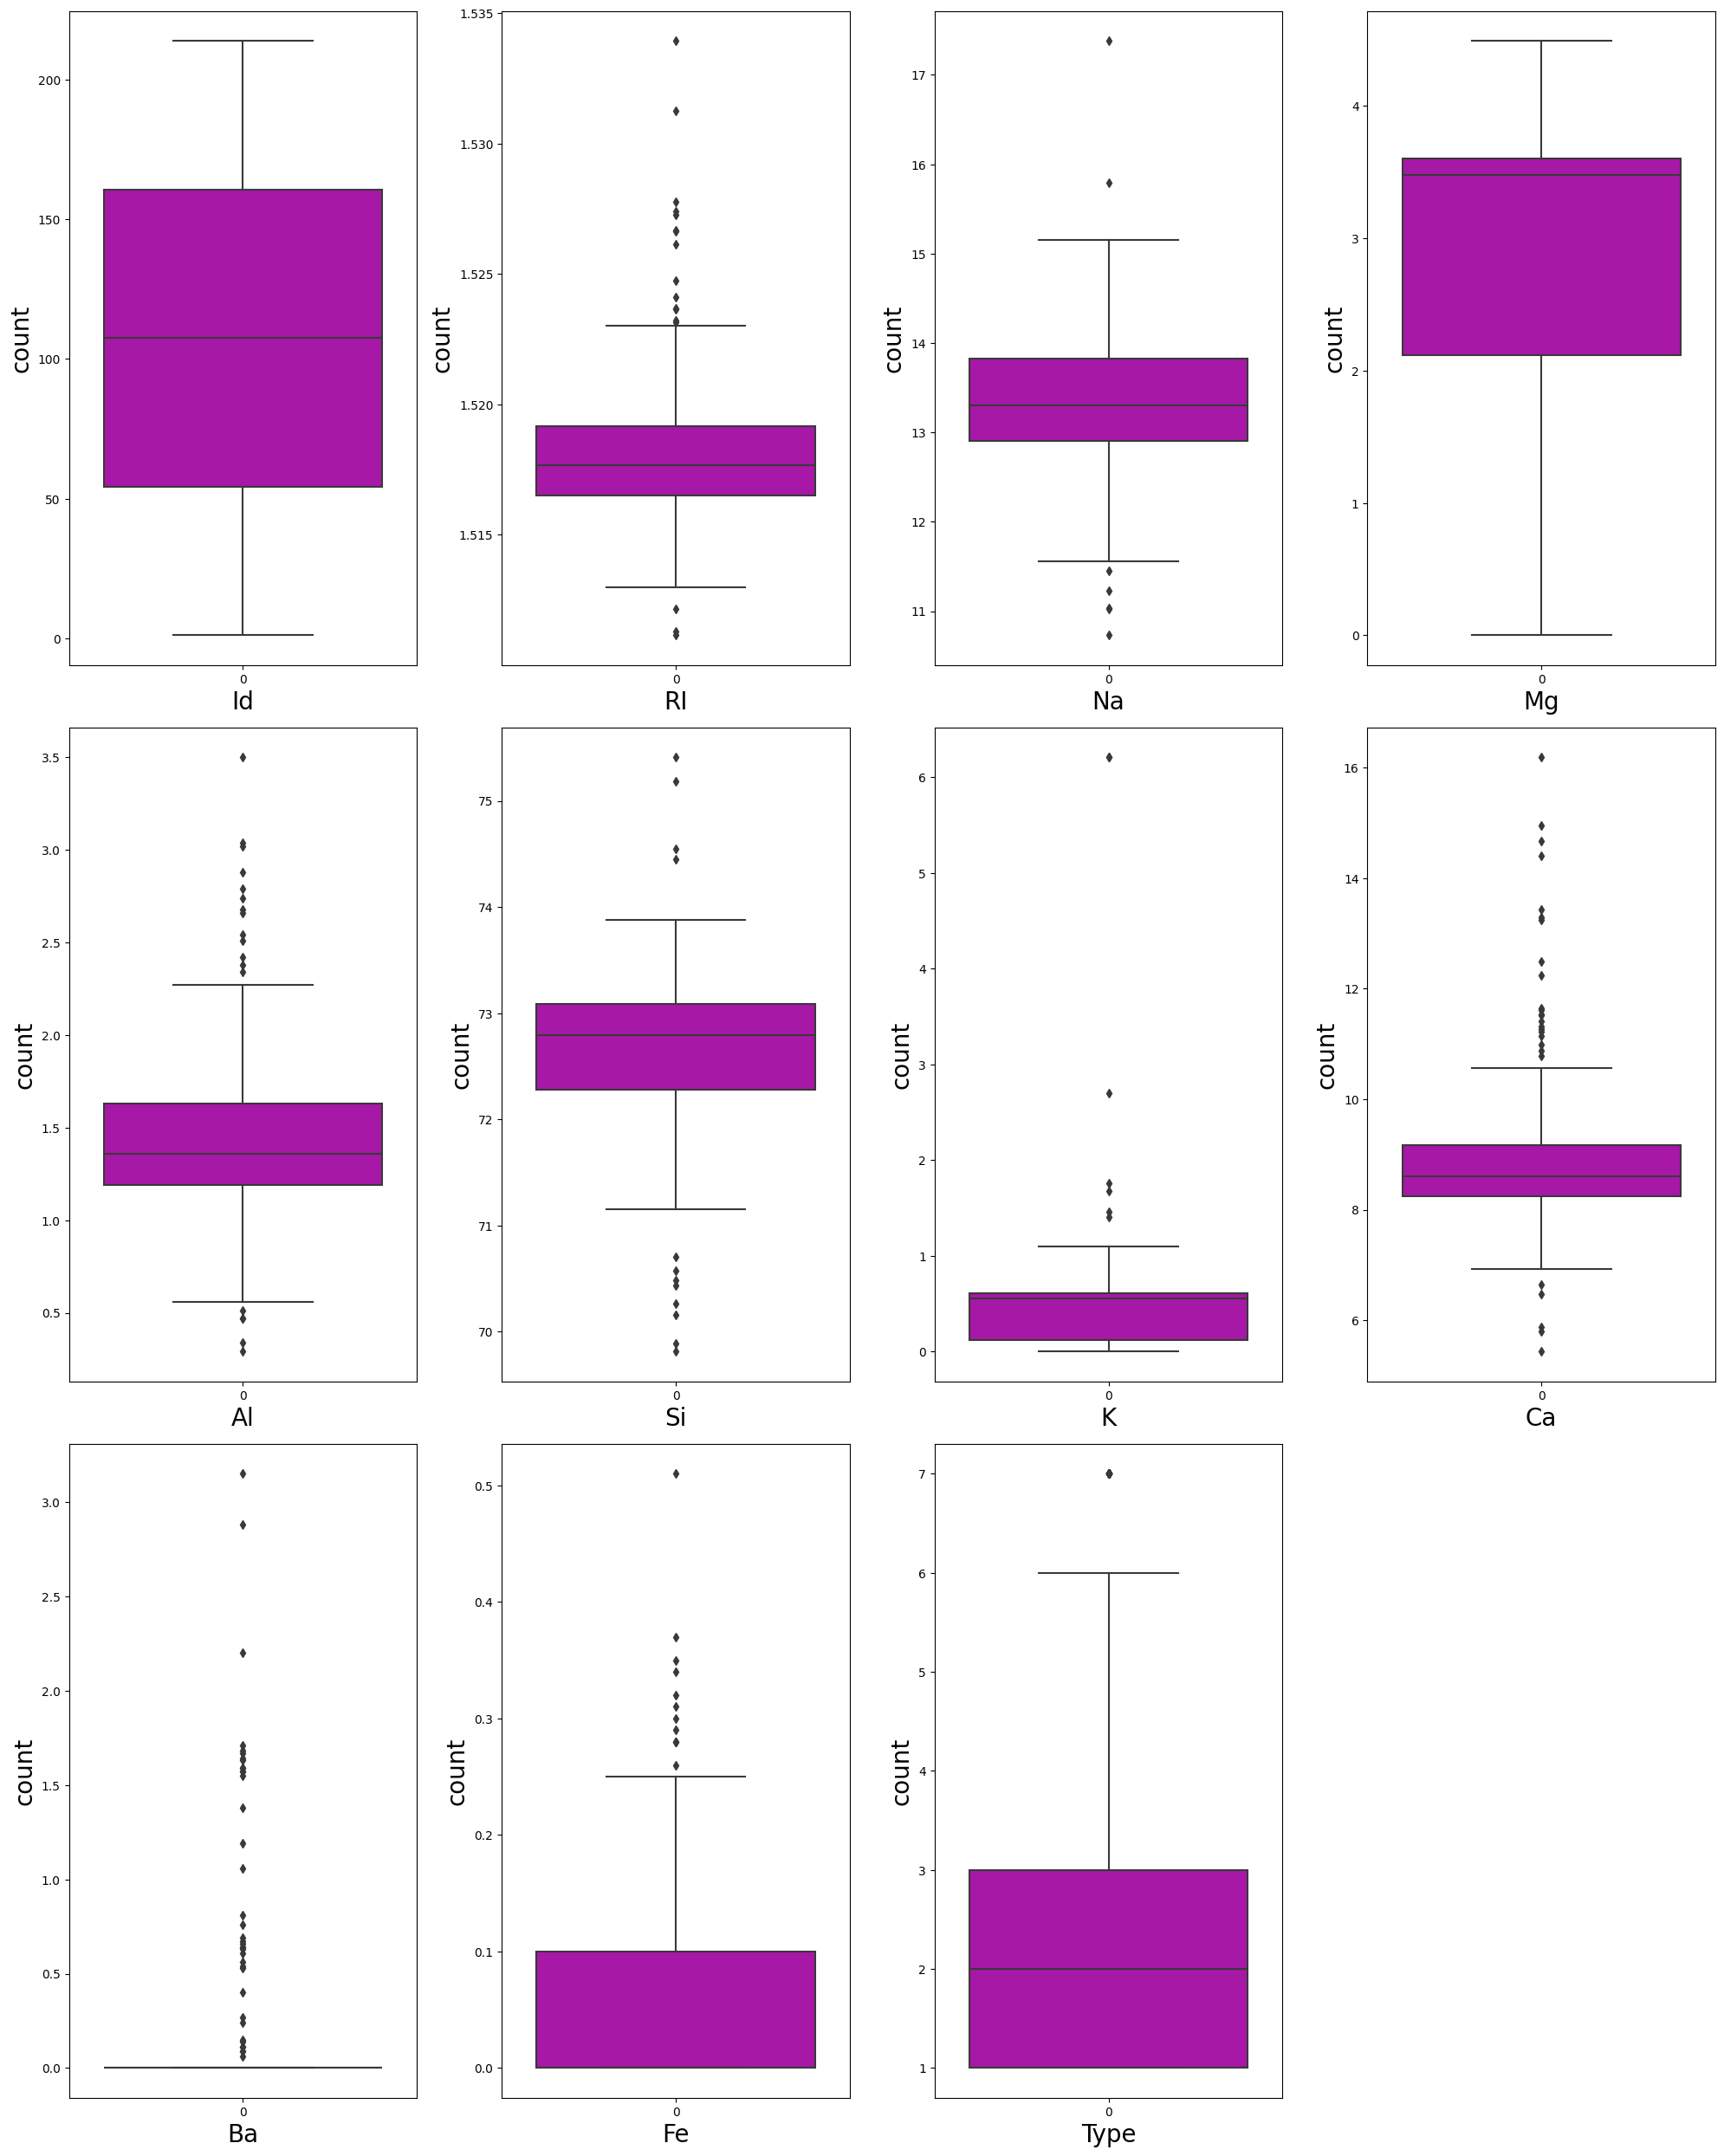

In [69]:
# boxplot
plt.figure(figsize=(20,25),facecolor='white')

p=1

for col in num_col:
    if p<=11:
        axs=plt.subplot(3,4,p)
        sns.boxplot(df[col],color='m')
        plt.xlabel(col,fontsize=20)
        plt.ylabel('count',fontsize=20)
        
        p+=1
plt.tight_layout()
plt.show()

In [140]:
from scipy.stats import zscore
out_features=df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
z=np.abs(zscore(out_features))
z

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,0.692442,1.127082,0.671705,0.145766,0.352877,0.586451
1,0.249333,0.591817,0.636168,0.170460,0.102319,0.026213,0.793734,0.352877,0.586451
2,0.721318,0.149933,0.601422,0.190912,0.438787,0.164533,0.828949,0.352877,0.586451
3,0.232831,0.242853,0.698710,0.310994,0.052974,0.112107,0.519052,0.352877,0.586451
4,0.312045,0.169205,0.650066,0.411375,0.555256,0.081369,0.624699,0.352877,0.586451
...,...,...,...,...,...,...,...,...,...
209,0.704815,0.898681,1.865511,2.881125,0.052974,0.640968,0.157088,1.783978,0.586451
210,0.500178,1.856097,1.865511,1.094342,0.529374,0.763919,0.392276,2.852405,0.586451
211,0.754046,1.168721,1.865511,1.154570,0.995252,0.763919,0.364103,2.953200,0.586451
212,0.612399,1.193270,1.865511,0.993960,1.241133,0.763919,0.335931,2.812087,0.586451


In [141]:
# removing the datd above the zscore and creatin the new df

df_cleaned=df[(z<3).all(axis=1)]
print(df_cleaned.shape)



(194, 11)


In [142]:
df.shape

(214, 11)

In [143]:
print('Data Loss percentage: ' ,((df.shape[0]-df_cleaned.shape[0])/df.shape[0])*100)
  # precentage should not more than 10% other wise we have to use another method to remove outliars or something else

Data Loss percentage:  9.345794392523365


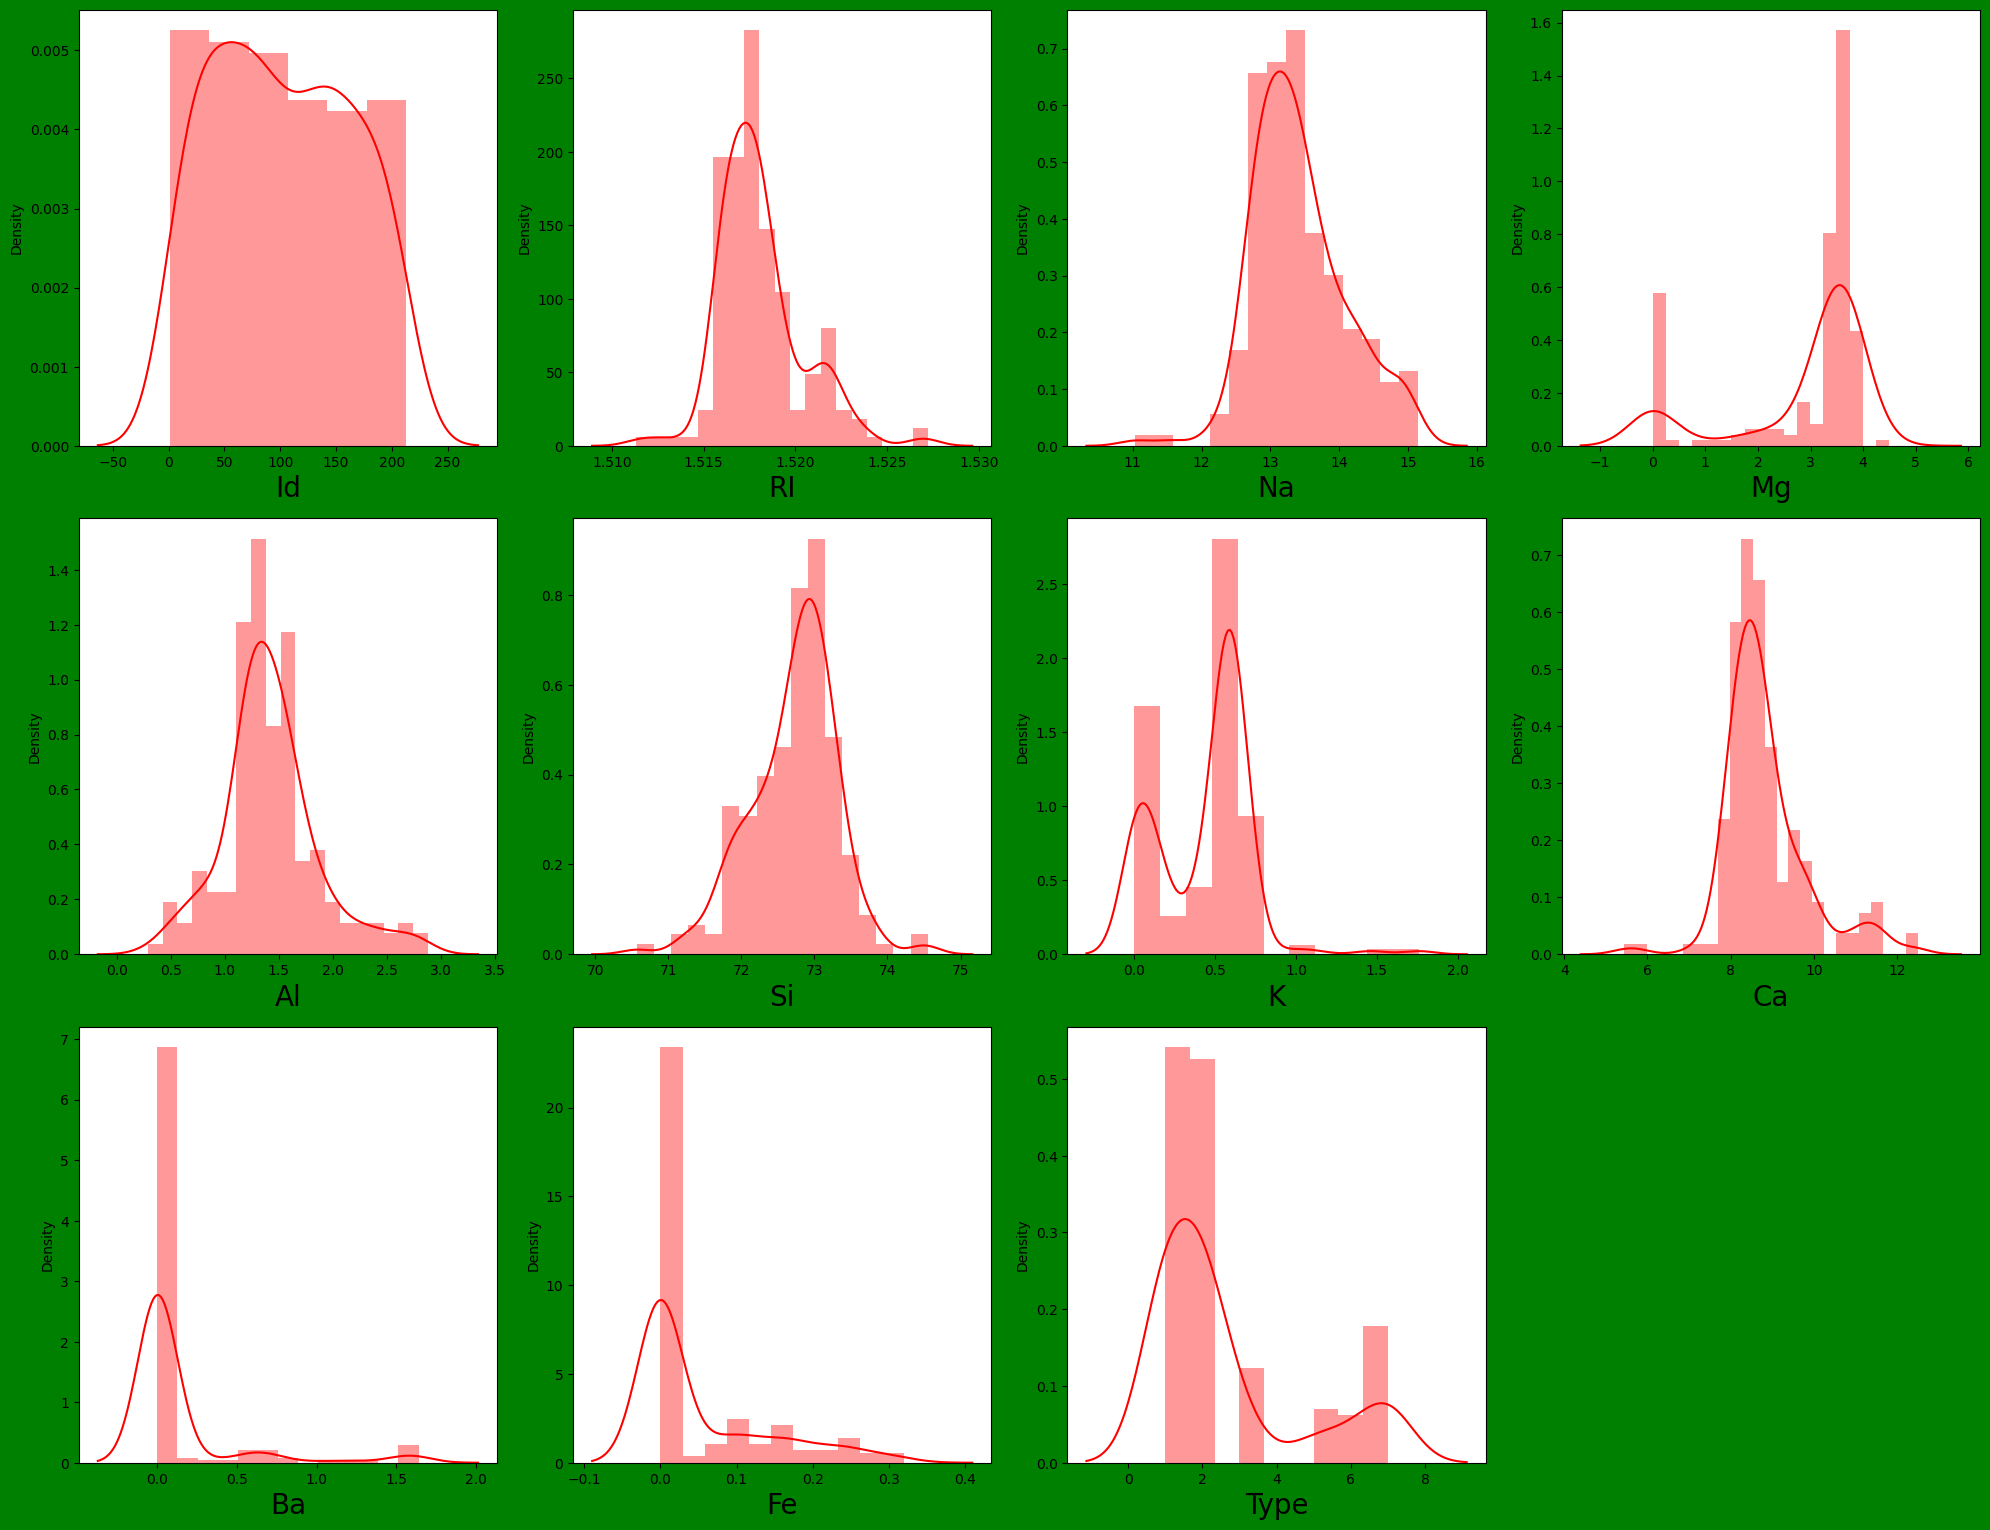

In [101]:
plt.figure(figsize=(20,25),facecolor='green')
p=1
for column in df_cleaned.columns:
    if p<=11:
        axs=plt.subplot(5,4,p)
        sns.distplot(df_cleaned[column],color='red')
        plt.xlabel(column,fontsize=20)
    p+=1
plt.tight_layout()
    


In [144]:
# checking skewness if closer to 0 means normal other wise skwed 

df_cleaned.skew()

Id      0.107537
RI      0.952733
Na      0.371482
Mg     -1.528849
Al      0.658259
Si     -0.425450
K       0.303175
Ca      1.077962
Ba      3.188587
Fe      1.486479
Type    1.284007
dtype: float64

<Axes: >

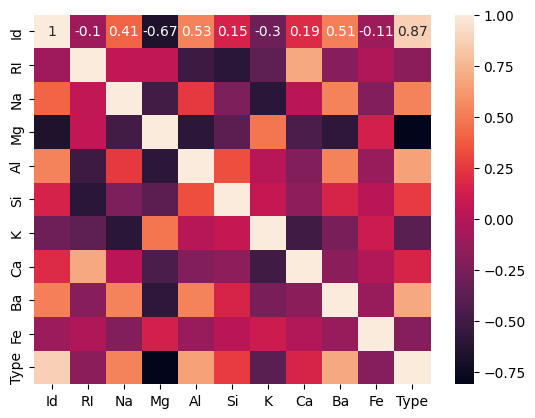

In [145]:
sns.heatmap(df_cleaned.corr(),annot=True)

In [146]:
df_cleaned.drop(['Id'],axis=1,inplace=True)
df_cleaned

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


In [147]:
# splitting x, y

x=df.drop('Type',axis=1)
y = df['Type'].apply(lambda value: 1 if value >= 5 else 0) # 1 to 4 window glass and 5 and above will non window glass

print(x)
print(y)

      Id       RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0      1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1      2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2      3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3      4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4      5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..   ...      ...    ...   ...   ...    ...   ...   ...   ...  ...
209  210  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210  211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211  212  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212  213  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213  214  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[214 rows x 10 columns]
0      0
1      0
2      0
3      0
4      0
      ..
209    1
210    1
211    1
212    1
213    1
Name: Type, Length: 214, dtype: int64


In [148]:
y.value_counts() # Target data is imbalances hence we have to use SMOTE to balance the target data


Type
0    163
1     51
Name: count, dtype: int64

In [149]:
# oversampling the data 
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)
print(x1)
print(y1)

# in Oversampling SMOTE will create new lines to balance the data
# in UnderSampling SMOTe will remove the lines or rows to balance the ratio of y 

      Id        RI         Na        Mg        Al         Si         K  \
0      1  1.521010  13.640000  4.490000  1.100000  71.780000  0.060000   
1      2  1.517610  13.890000  3.600000  1.360000  72.730000  0.480000   
2      3  1.516180  13.530000  3.550000  1.540000  72.990000  0.390000   
3      4  1.517660  13.210000  3.690000  1.290000  72.610000  0.570000   
4      5  1.517420  13.270000  3.620000  1.240000  73.080000  0.550000   
..   ...       ...        ...       ...       ...        ...       ...   
321  188  1.522950  13.857103  3.005143  1.473800  71.757283  0.646998   
322  187  1.519528  14.471553  2.962508  2.175095  70.972153  1.263543   
323  177  1.519214  13.810154  1.985712  1.841997  72.299274  0.306760   
324  182  1.519189  14.825937  0.482398  1.289781  72.873910  0.000000   
325  195  1.516197  14.213917  0.000000  2.328960  73.147929  0.085286   

            Ca        Ba        Fe  
0     8.750000  0.000000  0.000000  
1     7.830000  0.000000  0.000000  


In [150]:
y1.value_counts()

Type
0    163
1    163
Name: count, dtype: int64

In [151]:
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier , BaggingClassifier,ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix , classification_report,roc_auc_score,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [152]:
# Data Standardisation

from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()

x=pd.DataFrame(Scaler.fit_transform(x1),columns=x1.columns)
x

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,-2.102489,1.011342,0.018809,1.536773,-0.981051,-1.278407,-0.631542,-0.198202,-0.559569,-0.506473
1,-2.086898,-0.198627,0.305737,0.979565,-0.489982,-0.039679,0.049348,-0.872378,-0.559569,-0.506473
2,-2.071307,-0.707526,-0.107439,0.948262,-0.150011,0.299341,-0.096557,-0.909018,-0.559569,-0.506473
3,-2.055716,-0.180833,-0.474707,1.035912,-0.622193,-0.196150,0.195253,-0.586586,-0.559569,-0.506473
4,-2.040125,-0.266243,-0.405844,0.992087,-0.716629,0.416694,0.162830,-0.696506,-0.559569,-0.506473
...,...,...,...,...,...,...,...,...,...,...
321,0.813027,1.701829,0.267981,0.607140,-0.275046,-1.308028,0.320079,0.060603,-0.559569,-0.506473
322,0.797436,0.483893,0.973192,0.580447,1.049511,-2.331778,1.319602,-1.550809,1.422423,-0.506473
323,0.641526,0.372306,0.214097,-0.031101,0.420379,-0.601313,-0.231504,0.305670,-0.395822,1.673722
324,0.719481,0.363314,1.379923,-0.972289,-0.622606,0.147969,-0.728813,1.036242,-0.559569,-0.506473


In [153]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()

vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

# perfect positive corelation with target hence no need to drop any feature

,VIF Values,Features
0,2.639883,Id
1,7.937166,RI
2,91.742004,Na
3,331.607564,Mg
4,36.322901,Al
5,74.819324,Si
6,51.322561,K
7,247.299752,Ca
8,46.115971,Ba
9,1.349237,Fe


In [154]:
# Finding the best random state

from sklearn.model_selection import train_test_split


maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.20, random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    Pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,Pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Best Accuracy is : ",maxAccu,"at random state : ",maxRS)

Best Accuracy is :  1.0 at random state :  1


In [155]:
x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.20, random_state=maxRS)

In [156]:
# Random Forest classifier 

# Checking accuracy for RandoForestClassifier 

RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
PredRFC=RFC.predict(x_test)
print(accuracy_score(y_test,PredRFC))
print(confusion_matrix(y_test,PredRFC))
print(classification_report(y_test,PredRFC))


1.0
[[34  0]
 [ 0 32]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        32

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



In [159]:
# Extra Tree Classfier 

ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
PredET=ET.predict(x_test)
print(accuracy_score(y_test,PredET))
print(confusion_matrix(y_test,PredET))
print(classification_report(y_test,PredET))



1.0
[[34  0]
 [ 0 32]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        32

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



In [162]:
# Logistic Regresion

from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
LR.fit(x_train,y_train)
PredLR=LR.predict(x_test)
print(accuracy_score(y_test,PredLR))
print(confusion_matrix(y_test,PredLR))
print(classification_report(y_test,PredLR))


1.0
[[34  0]
 [ 0 32]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        32

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



In [165]:
# checking CV score for Randm Forest

scoreRFC=cross_val_score(RFC,x,y1)
print(scoreRFC)
print(scoreRFC.mean())
print( "Difference between Accuracy score and cross validation score is : ", accuracy_score(y_test,PredRFC)-scoreRFC.mean())

[1.         1.         1.         1.         0.83076923]
0.9661538461538461
Difference between Accuracy score and cross validation score is :  0.03384615384615386


In [166]:
# checking CV score for Logistic Regression

score=cross_val_score(LR,x,y1)
print(score)
print(score.mean())
print( "Difference between Accuracy score and cross validation score is : ", accuracy_score(y_test,PredLR)-score.mean())

[1.         1.         1.         0.89230769 0.93846154]
0.9661538461538461
Difference between Accuracy score and cross validation score is :  0.03384615384615386


In [167]:
# checking CV score for Extra Tree

scoreET=cross_val_score(ET,x,y1)
print(scoreET)
print(scoreET.mean())
print( "Difference between Accuracy score and cross validation score is : ", accuracy_score(y_test,PredET)-scoreET.mean())

[1.         1.         1.         0.92307692 0.98461538]
0.9815384615384616
Difference between Accuracy score and cross validation score is :  0.018461538461538418


In [ ]:
# Extra Tree classification isour best model as the Difference between Accuracy score and cross validation score is least here

Hyperparameter

In [168]:
from sklearn.model_selection import GridSearchCV

parameters={
    'criterion':['gini','entropy'],
    'random_state':[10,50,1000],
    'max_depth': [0,10,20],
    'n_jobs': [-2,-1,1],
    'n_estimators':[50,100,200,300]
}
parameters

{'criterion': ['gini', 'entropy'],
 'random_state': [10, 50, 1000],
 'max_depth': [0, 10, 20],
 'n_jobs': [-2, -1, 1],
 'n_estimators': [50, 100, 200, 300]}

In [170]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)
GCV

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [171]:
GCV.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [172]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'n_estimators': 50,
 'n_jobs': -2,
 'random_state': 10}

In [173]:
Final_model=ExtraTreesClassifier(criterion='gini',random_state=10,max_depth=10,n_jobs=-2,n_estimators=50)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

100.0


In [174]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import roc_curve

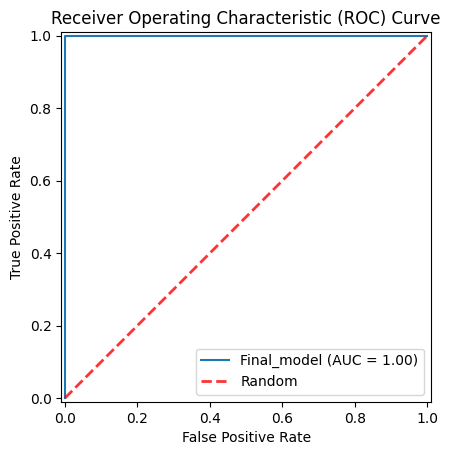

In [175]:
from sklearn import metrics


# Assuming `pred` is your model's predictions and `y_test` is the actual labels
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)

# Calculate the AUC (Area Under Curve) for ROC
roc_auc = metrics.auc(fpr, tpr)

# Create an ROC Curve plot using RocCurveDisplay
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Final_model")

# Plot the ROC Curve
display.plot()

# Add the diagonal line (representing random guess) to the plot
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)

# Set plot labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()


### Saving Model

In [176]:
# Lets load the saved model and get the prediction 
import joblib
joblib.dump(Final_model,'Glass_predict.pkl')

model=joblib.load('Glass_predict.pkl')

# prediction

Prediction=model.predict(x_test)

Prediction
    


array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1],
      dtype=int64)

In [177]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=Prediction
df['Original']=a
df

,Predicted,Original
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
61,0,0
62,1,1
63,1,1
64,0,0
